In [9]:
# HW3 disccussion group member: Jingyu Zhang 

# 1. Autoencoder 
  Build and fit a convolutional autoencoder for the CIFAR10 data set.The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on.The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.

  After training your network, visualize some examples of input images and their decoded reconstruction.

reference: https://blog.keras.io/building-autoencoders-in-keras.html

In [10]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential
from keras.datasets import cifar10
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LeakyReLU, LSTM, UpSampling2D
from keras.models import Model
from keras import backend as K 
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.optimizers import Adam
import keras
from keras import layers

In [11]:
# load the data 
(trainX, trainY), (testX, testY)=cifar10.load_data()

In [12]:
# print Training set shape 
print('Training set X shape is: ', trainX.shape) 
print('Training set Y shape is: ', trainY.shape)

# print Testing set shape 
print('Testing set X shape is: ', testX.shape) 
print('Testing  set Y shape is: ', testY.shape)



Training set X shape is:  (50000, 32, 32, 3)
Training set Y shape is:  (50000, 1)
Testing set X shape is:  (10000, 32, 32, 3)
Testing  set Y shape is:  (10000, 1)


In [13]:
# normalize image data 
trainX=trainX.astype('float32')/255.0
testX=testX.astype('float32')/255.0

In [14]:
print(trainX.shape)
print(testX.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
# train the autoencoder 
input_img=Input(shape=(32,32,3))

# Convolutional autoencoder: 
x = Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, kernel_size =  (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)          

In [16]:
autoencoder.fit(trainX, trainX,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(testX, testX))

Epoch 1/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0357 - accuracy: 0.4120 - val_loss: 0.0199 - val_accuracy: 0.5441
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0179 - accuracy: 0.5818 - val_loss: 0.0167 - val_accuracy: 0.5948
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0159 - accuracy: 0.6083 - val_loss: 0.0150 - val_accuracy: 0.6158
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0146 - accuracy: 0.6186 - val_loss: 0.0144 - val_accuracy: 0.6345
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0140 - accuracy: 0.6239 - val_loss: 0.0137 - val_accuracy: 0.6167
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0136 - accuracy: 0.6276 - val_loss: 0.0134 - val_accuracy: 0.6321
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0133 - accuracy: 0.6298 - val_loss: 0.0132 - val_accuracy: 0.6310

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


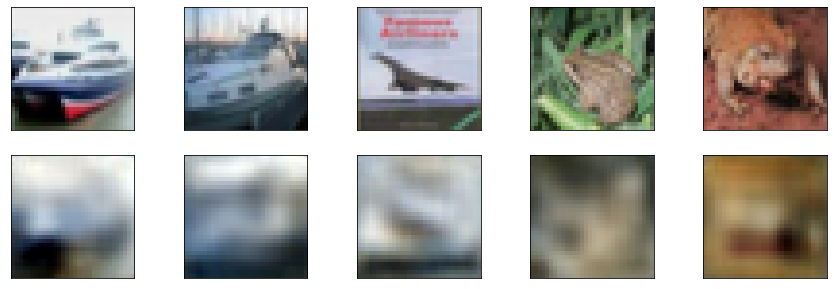

In [17]:
# Reconstructed images
decoded_imgs = autoencoder.predict(testX)

plt.figure(figsize=(15, 5))
for i in range(1,6):
    # original
    ax = plt.subplot(2, 5, i)
    plt.imshow(testX[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # after autoencoder 
    ax = plt.subplot(2, 5, i + 5)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# 2. Image Classification 

## 2.1 CNN
Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made:  kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performanceon the training set and test set.


Beief Description: \
The depth of CNN is 8, with 6 Conv layers and 2 Dense layers.  

There are 3 big blocks. The first block contains two Convolution 2D layers, each layer have 32 filters with kernel size of 3\*3 and relu activation. The second block contains two Convolution 2D layers, each layer have 64 filters with kernel size of 4\*4 and relu activation. The second block contains two Convolution 2D layers, each layer have 128 filters with kernel size of 5\*5 and relu activation. 

In each block, I choose MaxPool2D because I hope the model perform "feature extraction" function. To avoid overfitting, I added dropout to randomly "forget" some information learned. 

For padding, I choose "same" because I want the model add zero-padded values to the image. For the stride, I choose the default "sliding window" because this will capture all the features as kernel moves.

In the Dense layers, I choose 256 unites for the first one because I want the feature vector contains rich information while not be too complicated. Then the second Dense layer has 10 unites with softmax activation because the dataset has 10 categories. 



In [18]:
# load the data 
(trainX, trainY), (testX, testY)=cifar10.load_data()

In [19]:
# normalize image data 
trainX=trainX.astype('float32')/255.0
testX=testX.astype('float32')/255.0

In [20]:
testY

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [21]:
# one-hot encoding for labels 
# Although the labels are in 0~9 numbers format, they are actually categorical variables. We want to encode them into one-hot version.
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [22]:
model = tfk.Sequential()

# block 1
model.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3),  padding="same", activation='relu', input_shape=(32, 32, 3)))
model.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3),  padding="same", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(tfkl.Dropout(0.1)) # add dropout to prevent overfitting 

# block 2
model.add(tfkl.Conv2D(filters = 64, kernel_size=(4,4),  padding="same", activation='relu'))
model.add(tfkl.Conv2D(filters = 64, kernel_size=(4,4),  padding="same", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))
model.add(tfkl.Dropout(.2))  # add dropout to prevent overfitting 

# block 3
model.add(tfkl.Conv2D(filters = 128, kernel_size=(5,5),  padding="same", activation='relu'))
model.add(tfkl.Conv2D(filters = 128, kernel_size=(5,5),  padding="same", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))
model.add(tfkl.Dropout(.2))  # add dropout to prevent overfitting 


# fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu')) # choose 256 nodes because we want the features to be robust
model.add(Dropout(0.1))  # add dropout to prevent overfitting 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0

In [23]:
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

results = model.fit(trainX, trainY, steps_per_epoch=100, epochs=20, batch_size=500, validation_data=(testX, testY))

Epoch 1/20
100/100 [==============================] - 6s 64ms/step - loss: 1.9220 - accuracy: 0.2807 - val_loss: 1.5778 - val_accuracy: 0.4161
Epoch 2/20
100/100 [==============================] - 6s 63ms/step - loss: 1.4357 - accuracy: 0.4730 - val_loss: 1.2937 - val_accuracy: 0.5270
Epoch 3/20
100/100 [==============================] - 6s 63ms/step - loss: 1.2012 - accuracy: 0.5655 - val_loss: 1.0912 - val_accuracy: 0.6109
Epoch 4/20
100/100 [==============================] - 6s 64ms/step - loss: 1.0386 - accuracy: 0.6296 - val_loss: 0.9920 - val_accuracy: 0.6471
Epoch 5/20
100/100 [==============================] - 6s 64ms/step - loss: 0.9114 - accuracy: 0.6747 - val_loss: 0.8719 - val_accuracy: 0.6958
Epoch 6/20
100/100 [==============================] - 6s 64ms/step - loss: 0.7983 - accuracy: 0.7173 - val_loss: 0.7961 - val_accuracy: 0.7217
Epoch 7/20
100/100 [==============================] - 6s 64ms/step - loss: 0.7261 - accuracy: 0.7445 - val_loss: 0.7593 - val_accuracy: 0.7349

The model performance: \
Loss on training set is: 0.24 \
Loss on testing set is: 0.68 \
Accuracy on training set is: 0.91 \
Accuracy on testing set is: 0.80

## 2.2 Transfer Learning 
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and testset.

In [24]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop

# keep the VGG16 model as base
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3)) 
vgg_model = Sequential()
vgg_model.add(conv_base)

# build the final dense layer 
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation="relu"))
vgg_model.add(Dense(10, activation="softmax"))

# Compile 
vgg_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# summary
vgg_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_train = vgg_model.fit(trainX, trainY, batch_size = 1024, # make the batch as large as possible 
                                  epochs = 20,verbose=1,validation_data=(testX, testY))

Epoch 1/20
49/49 [==============================] - 20s 412ms/step - loss: 2.1982 - accuracy: 0.1516 - val_loss: 2.0384 - val_accuracy: 0.2055
Epoch 2/20
49/49 [==============================] - 15s 315ms/step - loss: 1.9991 - accuracy: 0.2026 - val_loss: 1.8716 - val_accuracy: 0.2373
Epoch 3/20
49/49 [==============================] - 15s 315ms/step - loss: 1.7872 - accuracy: 0.2650 - val_loss: 1.6497 - val_accuracy: 0.3365
Epoch 4/20
49/49 [==============================] - 15s 315ms/step - loss: 1.6252 - accuracy: 0.3456 - val_loss: 1.4750 - val_accuracy: 0.3888
Epoch 5/20
49/49 [==============================] - 15s 316ms/step - loss: 1.3664 - accuracy: 0.4665 - val_loss: 1.2198 - val_accuracy: 0.5226
Epoch 6/20
49/49 [==============================] - 16s 316ms/step - loss: 1.1342 - accuracy: 0.5730 - val_loss: 1.0286 - val_accuracy: 0.6195
Epoch 7/20
49/49 [==============================] - 16s 317ms/step - loss: 0.9110 - accuracy: 0.6679 - val_loss: 0.9689 - val_accuracy: 0.6582

The model performance: \
Loss on training set is: 0.0861 \
Loss on testing set is: 0.9366 \
Accuracy on training set is: 0.9732 \
Accuracy on testing set is: 0.7934

# 3. Text Classification 

Background.In this problem, we will build models that read text segments (messages) and identify whether they are SPAM or HAM.

Wikipedia describes SPAMas “the use of electronic messaging systems tosend unsolicited bulk messages, especially advertising, indiscriminately.”

The term ‘HAM’ was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desiredand isn’t considered SPAM.”

Dataset.The dataset consists of∼5500 messages along with binary labels(SPAM or HAM) and is already preprocessed. So basically each sample is like [MESSAGE, LABEL]. 

## 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [26]:
# load data 
data=pd.read_csv('SPAM_detection.csv')
data.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [27]:
x = data['Message'].copy()
y = data['category_val']

In [28]:
# data cleaning and preprocessing 
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
def data_cleaner(text):
    # remove urls
    text = re.sub(r'http\S+', ' ', text)
    # remove html tags
    text = re.sub(r'<.*?>',' ', text)
    # remove digits
    text = re.sub(r'\d+',' ', text)
    #removing stop words
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])
    return text
stop_words = stopwords.words('english')
x_cleaned = x.apply(data_cleaner)

In [30]:
# tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# try word-level embedding 
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(x_cleaned)
x = tokenizer.texts_to_sequences(x_cleaned)

Text(0.5, 0, 'sentence word length')

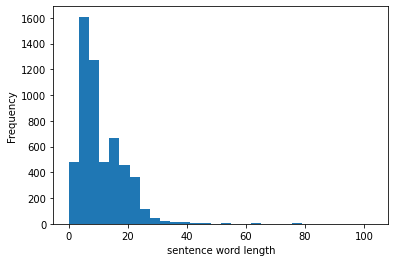

In [31]:
# check the distribution of the number of sentence word length 
length_list=[] 
for i in x: 
  length_list.append(len(i))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(length_list, density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('sentence word length') 

According to the plot, most sentence have less than 40 words. So I set 40 as the max length for padding.

In [32]:
# padding 
maxlen=40
x = pad_sequences(x, padding='post', maxlen=maxlen)

In [33]:
# check the format of x
x[0]

array([  12, 3983,  779,  703,  610, 1250,   32,   79,  306,  955,  105,
       2763, 1251,   21, 3984,   98,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [34]:
import sklearn
# split training and testing set 
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
# check the vocabulary size 
vocab_size = len(tokenizer.word_index)+1
vocab_size

7994

RNN with LSTM

In [36]:
model_RNN =Sequential()
model_RNN.add(tfkl.Embedding(vocab_size, 32, input_length=40))
model_RNN.add(tfkl.LSTM(128,return_sequences=True))
model_RNN.add(tfkl.GlobalMaxPool1D())
model_RNN.add(tfkl.Dropout(0.25))

model_RNN.add(tfkl.Dense(32,activation="relu"))
model_RNN.add(tfkl.Dropout(0.25))

model_RNN.add(tfkl.Dense(1,activation="sigmoid"))
model_RNN.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])
model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 32)            255808    
_________________________________________________________________
lstm (LSTM)                  (None, 40, 128)           82432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [37]:
model_RNN.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
70/70 [==============================] - 1s 15ms/step - loss: 0.1949 - accuracy: 0.9390 - val_loss: 0.0820 - val_accuracy: 0.9713
Epoch 2/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0519 - accuracy: 0.9877 - val_loss: 0.0791 - val_accuracy: 0.9794
Epoch 3/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0375 - accuracy: 0.9935 - val_loss: 0.0991 - val_accuracy: 0.9785
Epoch 4/5
70/70 [==============================] - 1s 10ms/step - loss: 0.0265 - accuracy: 0.9953 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 5/5
70/70 [==============================] - 1s 10ms/step - loss: 0.0174 - accuracy: 0.9975 - val_loss: 0.1121 - val_accuracy: 0.9803


The model performance: \
Loss on training set is: 0.0174 \
Loss on testing set is: 0.1121 \
Accuracy on training set is: 0.9975 \
Accuracy on testing set is: 0.9803

In [38]:
# calculation for ROC viz
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pred_y_rnn = model_RNN.predict(x_test).ravel()
fpr_rnn, tpr_rnn, rnn_ = roc_curve(y_test, pred_y_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

## 3.2 CNN
Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings). 

Tips: after splitting every character in each training sample, the maximum length of training samples can be really big.  If you choose to only do the padding trick to all the samples, it might raise OOM issues. So instead of padding only, you can also cut each sample at a certain point, which can make training more efficient and feasible while using CNN.

tutorial reference: https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33

In [39]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.models import Sequential

In [40]:
data=pd.read_csv("SPAM_detection.csv")
x = data['Message']
y = data['category_val']

In [41]:
# try character level embedding 
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

Text(0.5, 0, 'sentence character length')

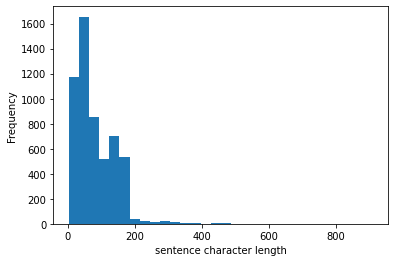

In [42]:
# check the distribution of the number of sentence character length 
length_list=[] 
for i in x: 
  length_list.append(len(i))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(length_list, density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('sentence character length') 

According to the plot, most sentences have characters less than 200. So I will set maxlen=200 for padding

In [43]:
max_features = 500
maxlen =200
x = sequence.pad_sequences(x, maxlen)

In [44]:
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
x_train.shape

(4457, 200)

In [46]:
from keras.layers.convolutional import Conv1D
from keras.layers import SpatialDropout1D, MaxPool1D
from keras.models import Sequential 
from keras.optimizers import Adam  


In [47]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 128, input_length = maxlen))

model_CNN.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
model_CNN.add(SpatialDropout1D(0.1))
model_CNN.add(MaxPool1D())

model_CNN.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
model_CNN.add(SpatialDropout1D(0.2))
model_CNN.add(MaxPool1D())

model_CNN.add(Conv1D(32,activation='relu', kernel_size=2,padding='valid'))
model_CNN.add(SpatialDropout1D(0.2))
model_CNN.add(MaxPool1D())

model_CNN.add(Flatten())
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 128)          49280     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 198, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 99, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 97, 64)            24640     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 97, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 64)           

In [48]:
model_CNN.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [49]:
model_CNN.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
70/70 [==============================] - 1s 14ms/step - loss: 0.3192 - accuracy: 0.8773 - val_loss: 0.2528 - val_accuracy: 0.8601
Epoch 2/5
70/70 [==============================] - 1s 9ms/step - loss: 0.1616 - accuracy: 0.9432 - val_loss: 0.0763 - val_accuracy: 0.9794
Epoch 3/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 4/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0621 - val_accuracy: 0.9839
Epoch 5/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0549 - val_accuracy: 0.9839


The model performance: \
Loss on training set is: 0.0639 \
Loss on testing set is: 0.0549 \
Accuracy on training set is: 0.9800 \
Accuracy on testing set is: 0.9839

In [50]:
# Calculation for ROC Viz
pred_y_cnn = model_CNN.predict(x_test).ravel()
fpr_cnn, tpr_cnn, cnn_ = roc_curve(y_test, pred_y_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

## 3.3 ROC
Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

In [51]:
from sklearn.metrics import roc_curve, auc
# reference: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

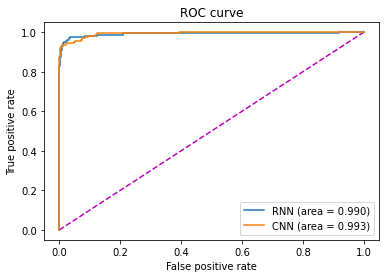

In [52]:
plt.figure()
plt.plot([0, 1], [0, 1], 'm--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()
